<a href="https://colab.research.google.com/github/honestycitra/NucleiSegmentation/blob/master/Proyek_UAS_cycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREREQUISITES**


*   NVIDIA GPU (Tested on Nvidia P100 using Google Cloud)
*   torchvision
*   dominate>=2.6.0
*   visdom>=0.1.8.3
*   Scipy>=1.1.0






##Mengunduh code yang ada pada repositori dan install library

In [1]:
!git clone https://github.com/honestycitra/NucleiSegmentation.git


Cloning into 'NucleiSegmentation'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 241 (delta 47), reused 125 (delta 45), pack-reused 93
Receiving objects: 100% (241/241), 11.98 MiB | 12.90 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [3]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install dominate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install visdom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 676 kB 26.6 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=6f81d6d9eb92778e64540da23ff033b91b80695149a2c84ab27bd5e776606df8
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=760092cc3c245fc79b4d7ae2fa9abc0b1770397d6d8aec216869d7362f8ae4f9
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built visdom torchfile


In [6]:
!pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.8 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [7]:
# Cek GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Change directory (cd) ke tempat model berada

In [8]:
%cd /content/NucleiSegmentation

/content/NucleiSegmentation


### Menghilangkan file .pyc atau (*python chance*)

In [9]:
!find . -name "*.pyc" -exec git rm {} \;

rm 'options/train_options.pyc'
rm 'options/test_options.pyc'
rm 'options/base_options.pyc'
rm 'options/__init__.pyc'
rm 'data/base_dataset.pyc'
rm 'data/unaligned_dataset.pyc'
rm 'data/base_data_loader.pyc'
rm 'data/__init__.pyc'
rm 'data/image_folder.pyc'
rm 'data/aligned_dataset.pyc'
rm 'models/pix2pix_model.pyc'
rm 'models/base_model.pyc'
rm 'models/networks.pyc'
rm 'models/cycle_gan_model.pyc'
rm 'models/__init__.pyc'
rm 'models/spectral_norm.pyc'
rm 'util/util.pyc'
rm 'util/visualizer.pyc'
rm 'util/html.pyc'
rm 'util/image_pool.pyc'
rm 'util/__init__.pyc'


# **Dataset**

Dataset bersumber dari [Kaggle](https://www.kaggle.com/datasets/tuanledinh/monuseg2018) dimana dataset berupa gambar dan label, dengan data training dan data testing masing-masing berjumlah 24 dan 7. 

Dataset yang ada kemudian dilakukan prepocessing. Pertama, dilakukan re-size gambar menjadi 256x256 pixel dalam file '.png'. Selanjutnya, semua data gambar dan label dipasangkan bersama dalam gambar 512x256 pixel. Berikut ini salah satu data training yang telah dilakukan tahap preprocessing:

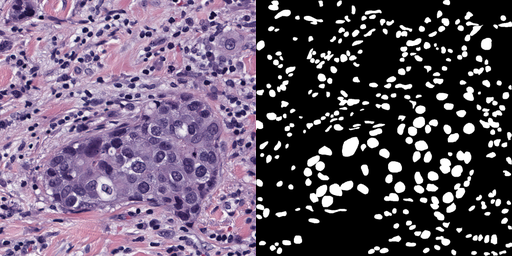

# **Generate Synthetic Images**


## **Training data menggunakan cycleGAN**

In [17]:
!python train.py --dataroot /content/NucleiSegmentation/datasets/Nuclei_Segmentation --name NU_SEG  --gpu_ids 0 --display_id 0 --niter 200 --niter_decay 200 --pool_size 64 --loadSize 256 --fineSize 256 --model "cycle_gan"

----------------- Options ---------------
                batchSize: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                 dataroot: /content/NucleiSegmentation/datasets/Nuclei_Segmentation	[default: None]
             dataset_mode: aligned                       
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
              epoch_count: 1                             
                 fineSize: 256                           
                  gpu_ids: 0                             
                init_gain: 0.02  

**Output training pada epoch 400**

hasil dengan file bernama epoch_rec  merupaakan gambar sintetis.

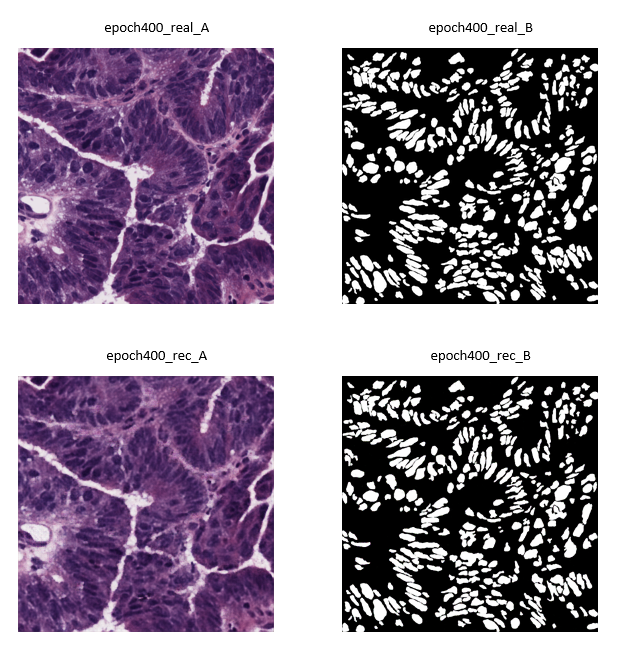

## **Testing data menggunakan cycleGAN**

In [21]:
!python test.py --dataroot /content/NucleiSegmentation/datasets/Nuclei_Segmentation --name NU_SEG  --gpu_ids 0 --display_id 0  --loadSize 256 --fineSize 256 --model "cycle_gan"  --checkpoints_dir /content/NucleiSegmentation/checkpoints

----------------- Options ---------------
             aspect_ratio: 1.0                           
                batchSize: 1                             
          checkpoints_dir: /content/NucleiSegmentation/checkpoints	[default: ./checkpoints]
                 dataroot: /content/NucleiSegmentation/datasets/Nuclei_Segmentation	[default: None]
             dataset_mode: aligned                       
               display_id: 0                             	[default: 1]
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                 fineSize: 256                           
                  gpu_ids: 0                             
                 how_many: 50                            
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             

**Output testing berupa data sintetis**

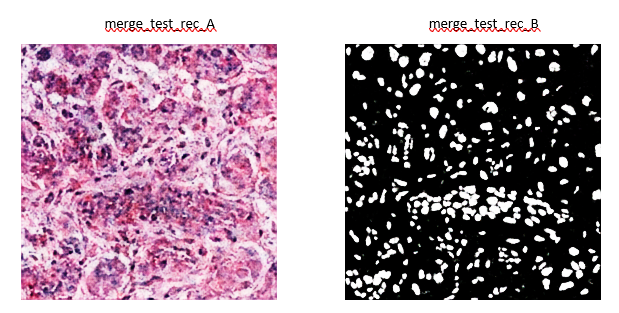